In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import seaborn as sns
import platform

In [105]:
# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [106]:
# 데이터 불러오기
min_wage = pd.read_excel('./data/연도별_최저임금.xlsx')
min_wage

,연도,시급,일급,월급,인상액,인상률
0,2022,9160,73280,1914440,440,5.05
1,2021,8720,69760,1822480,130,1.50
2,2020,8590,68720,1795310,241,2.87
3,2019,8350,66800,1745150,820,10.90
4,2018,7530,60240,1573770,1060,16.40
5,2017,6470,51760,1352230,440,7.30
6,2016,6030,48240,1260270,450,8.10


In [107]:
# 데이터 전처리(결측치, 이상치)
min_wage.info()
min_wage.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      7 non-null      int64  
 1   시급      7 non-null      int64  
 2   일급      7 non-null      int64  
 3   월급      7 non-null      int64  
 4   인상액     7 non-null      int64  
 5   인상률     7 non-null      float64
dtypes: float64(1), int64(5)
memory usage: 464.0 bytes


,연도,시급,일급,월급,인상액,인상률
count,7.000000,7.000000,7.000000,7.000000e+00,7.000000,7.000000
mean,2019.000000,7835.714286,62685.714286,1.637664e+06,511.571429,7.445714
std,2.160247,1196.409310,9571.274483,2.500495e+05,323.713792,5.075903
min,2016.000000,6030.000000,48240.000000,1.260270e+06,130.000000,1.500000
25%,2017.500000,7000.000000,56000.000000,1.463000e+06,340.500000,3.960000
50%,2019.000000,8350.000000,66800.000000,1.745150e+06,440.000000,7.300000
75%,2020.500000,8655.000000,69240.000000,1.808895e+06,635.000000,9.500000
max,2022.000000,9160.000000,73280.000000,1.914440e+06,1060.000000,16.400000


In [108]:
# 데이터 전처리(중복치)
min_wage[min_wage.duplicated()]

,연도,시급,일급,월급,인상액,인상률


In [109]:
# 데이터 정제(소수 -> 정수 변환)
min_wage[['연도', '시급', '일급', '월급']].astype(int)

,연도,시급,일급,월급
0,2022,9160,73280,1914440
1,2021,8720,69760,1822480
2,2020,8590,68720,1795310
3,2019,8350,66800,1745150
4,2018,7530,60240,1573770
5,2017,6470,51760,1352230
6,2016,6030,48240,1260270


In [110]:
# 데이터 정제(필요한 column, row 추출)
min_wage = min_wage[['연도','시급', '일급', '월급','인상률']]
min_wage = min_wage[min_wage['연도'] != 2022]

In [111]:
# 데이터 정제(연도 순으로 정렬 + 연도 타입변경)
min_wage = min_wage.sort_values('연도').reset_index(drop=True)
min_wage['연도'] = min_wage['연도'].astype(str)+'년'

In [112]:
min_wage

,연도,시급,일급,월급,인상률
0,2016년,6030,48240,1260270,8.10
1,2017년,6470,51760,1352230,7.30
2,2018년,7530,60240,1573770,16.40
3,2019년,8350,66800,1745150,10.90
4,2020년,8590,68720,1795310,2.87
5,2021년,8720,69760,1822480,1.50


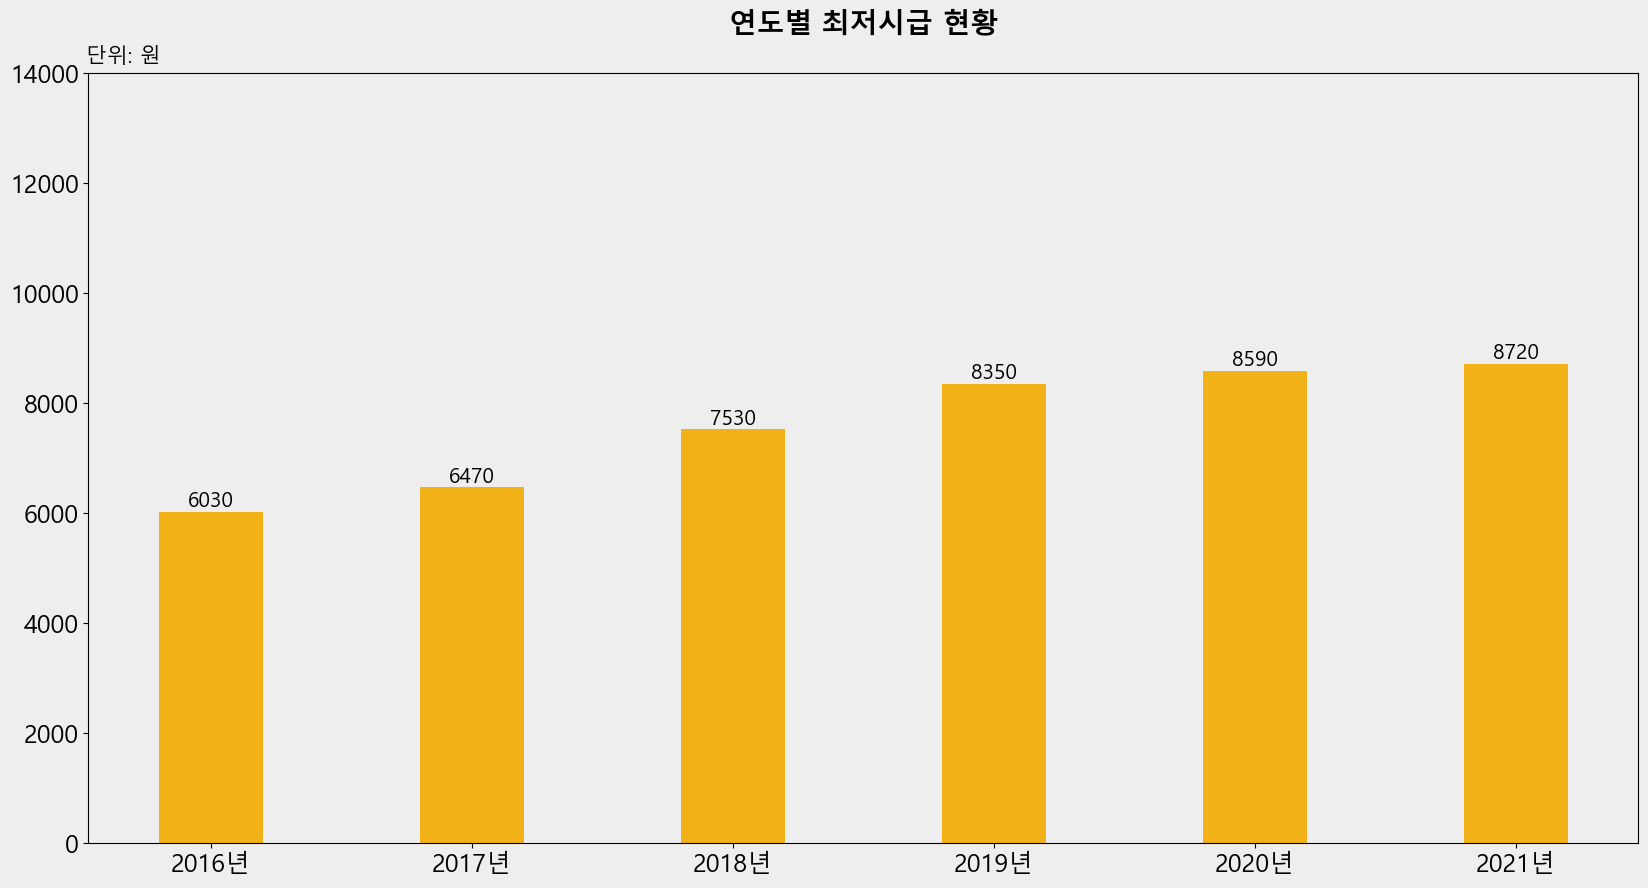

In [113]:
# 정제된 데이터 시각화(최저시급)
ylist = np.arange(0,16000,2000)

fig = plt.figure(figsize=(20,10))

fig.set_facecolor('#EEEEEE')
plt.gca().set_facecolor('#EEEEEE')
plt.rc('font', family = 'Malgun Gothic', size = 18)

plt.title('연도별 최저시급 현황',fontsize = 20,loc='center', pad=30, fontweight="bold")
ax = plt.bar(min_wage['연도'],min_wage['시급'],width=0.4, color =['#F2B117'])

plt.yticks(ylist)
plt.text(-0.48,14200, '단위: 원', fontsize=15, color = 'black')

# 그래프 상단에 값 추가하기
for i, v in enumerate(min_wage['연도']):
    plt.text(v, min_wage['시급'][i], min_wage['시급'][i],
             fontsize = 15,
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

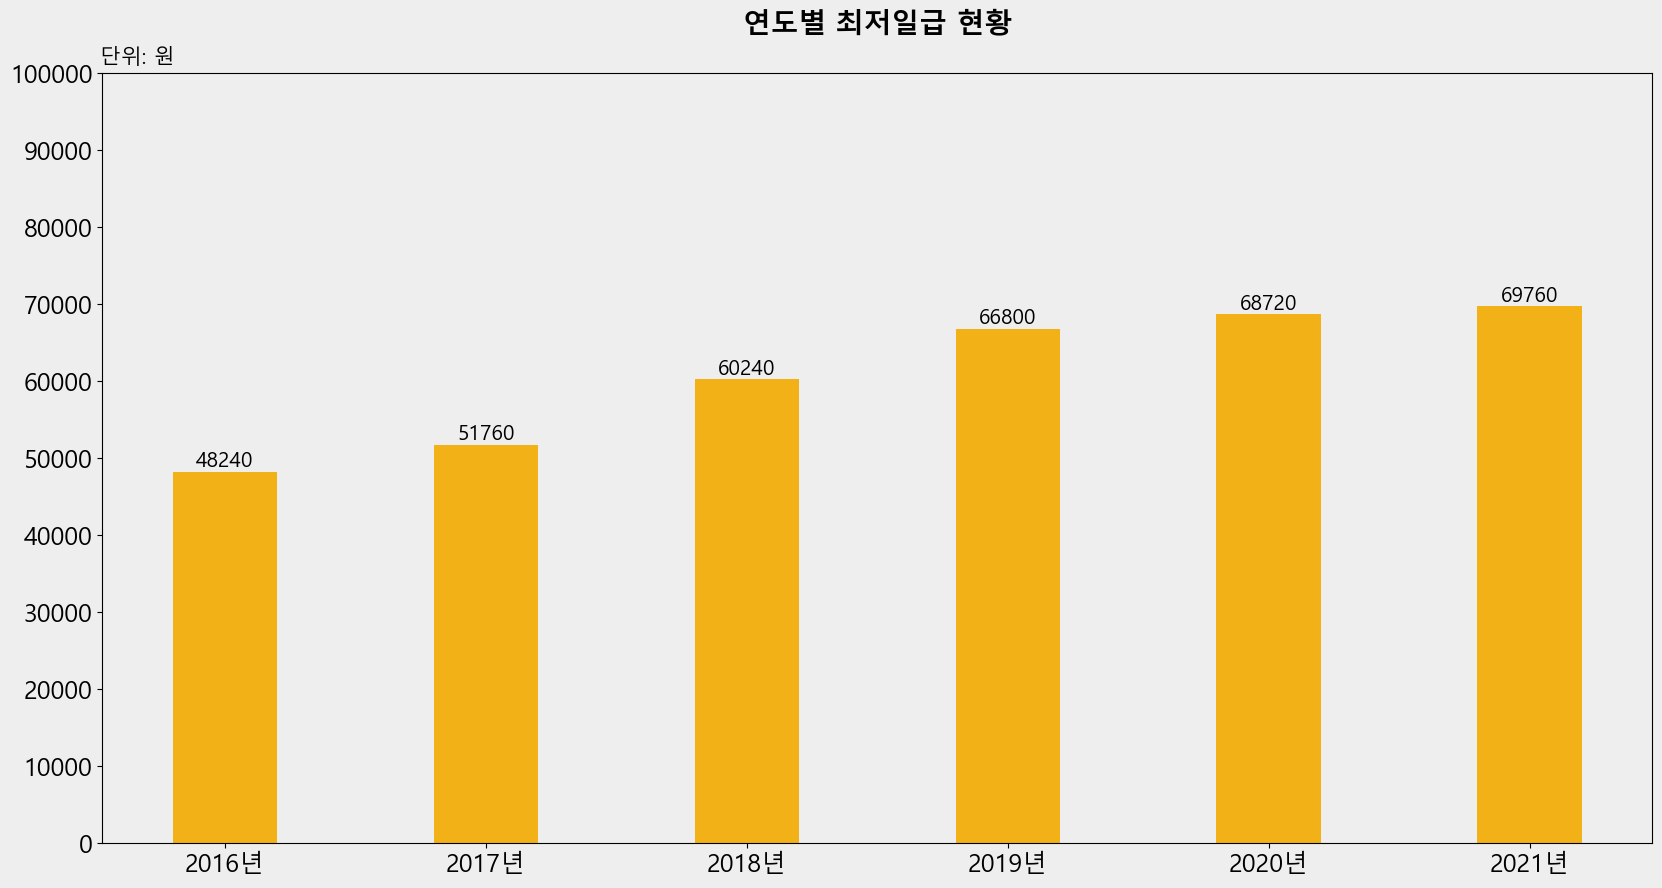

In [114]:
# 정제된 데이터 시각화(최저일급)
ylist = np.arange(0,110000,10000)
fig = plt.figure(figsize=(20,10))
fig.set_facecolor('#EEEEEE')
plt.rc('font', family = 'Malgun Gothic', size = 18)
plt.title('연도별 최저일급 현황',fontsize = 20,loc='center', pad=30, fontweight="bold")
ax = plt.bar(min_wage['연도'],min_wage['일급'],width=0.4, color ='#F2B117')
plt.gca().set_facecolor('#EEEEEE')
plt.yticks(ylist)
plt.text(-0.48,101200, '단위: 원', fontsize=15, color = 'black')

# 그래프 상단에 값 추가하기
for i, v in enumerate(min_wage['연도']):
    plt.text(v, min_wage['일급'][i], min_wage['일급'][i],
             fontsize = 15,
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

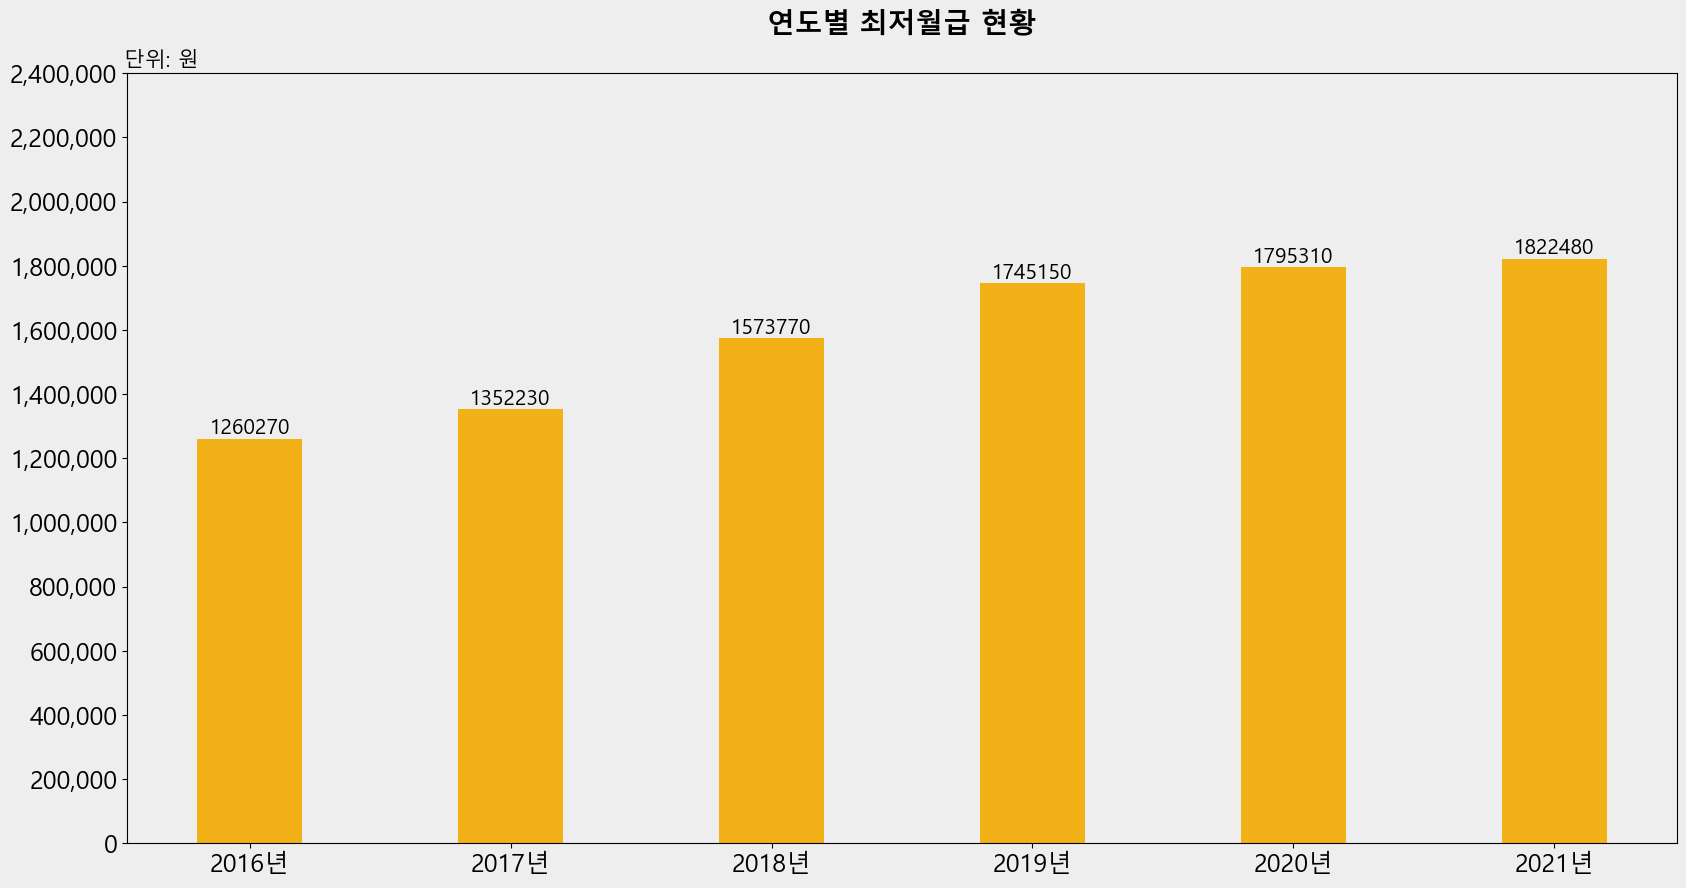

In [115]:
# 정제된 데이터 시각화
ylist = np.arange(0,2500000,200000)
fig = plt.figure(figsize=(20,10))
fig.set_facecolor('#EEEEEE')
plt.rc('font', family = 'Malgun Gothic', size = 18)
plt.title('연도별 최저월급 현황',fontsize = 20,loc='center', pad=30, fontweight="bold")
ax = plt.bar(min_wage['연도'],min_wage['월급'],width=0.4, color ='#F2B117')
plt.gca().set_facecolor('#EEEEEE')
plt.yticks(ylist)

# 그래프 원 단위 변경
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ylist])
plt.text(-0.48,2420000, '단위: 원', fontsize=15, color = 'black')

# 그래프 상단에 값 추가하기
for i, v in enumerate(min_wage['연도']):
    plt.text(v, min_wage['월급'][i], min_wage['월급'][i],
             fontsize = 15,
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

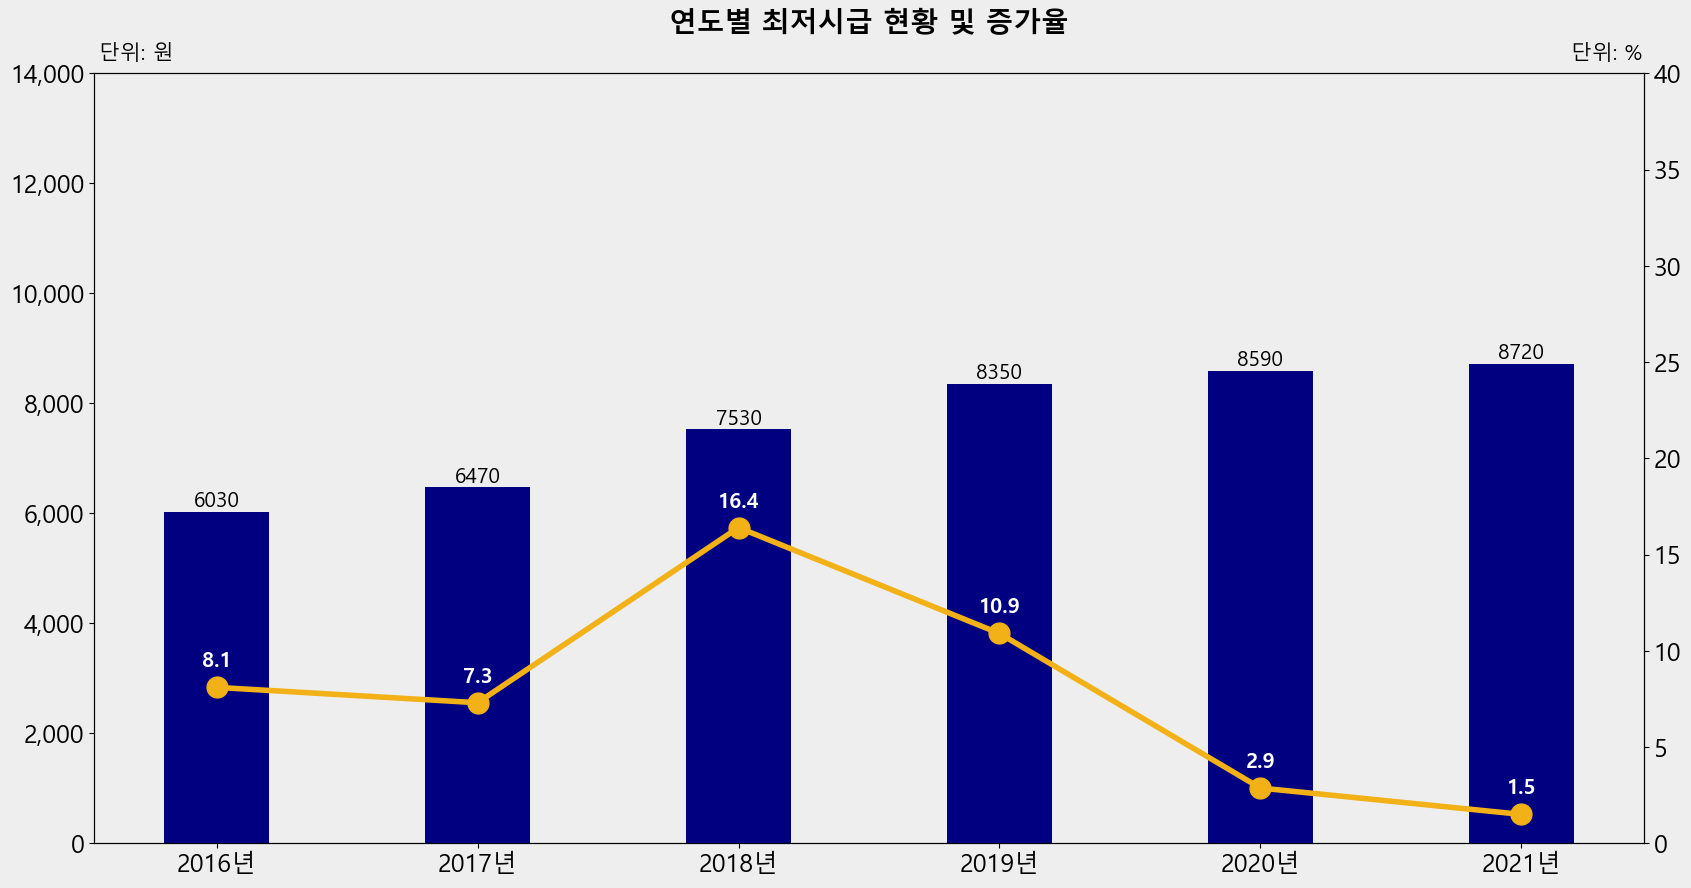

In [118]:
# 정제된 데이터 시각화(최저 시급)
ax1_ylist = np.arange(0,16000,2000)
ax2_ylist = np.arange(0,45,5)

plt.rc('font', family = 'Malgun Gothic', size = 18)
fig, ax1 = plt.subplots(figsize=(20, 10))
fig.set_facecolor('#EEEEEE')

ax1.set_title('연도별 최저시급 현황 및 증가율',fontsize = 20,loc='center', pad=30, fontweight="bold")
ax1.text(-0.45,14250, '단위: 원', fontsize=15, color = 'black')
ax1.bar(min_wage['연도'],min_wage['시급'], width=0.4 ,color ='navy')
ax1.set_facecolor('#EEEEEE')
ax1.set_yticks(ax1_ylist)
# 천원 단위 콤마(,) 찍기
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ax1_ylist])
# 그래프 상단에 값 추가하기
for i, v in enumerate(min_wage['연도']):
    plt.text(v, min_wage['시급'][i], min_wage['시급'][i],
             fontsize = 15,
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

ax2 = ax1.twinx()
ax2.plot(min_wage['연도'],min_wage['인상률'], marker='o', ms= 15,color ='#F2B117')

plt.rcParams['lines.linewidth'] = 4

ax2.set_yticks(ax2_ylist)

ax2.text(5.19,40.7, '단위: %', fontsize=15, color = 'black')

#그래프 상단에 값 추가하기
for i in range(len(min_wage['인상률'])):
    height = min_wage['인상률'][i:i+1]
    plt.text(min_wage['연도'][i:i+1], height + 0.8, '%.1f' %height, ha='center', va='bottom', size = 15, 
             color='white', fontweight='bold')

plt.show()

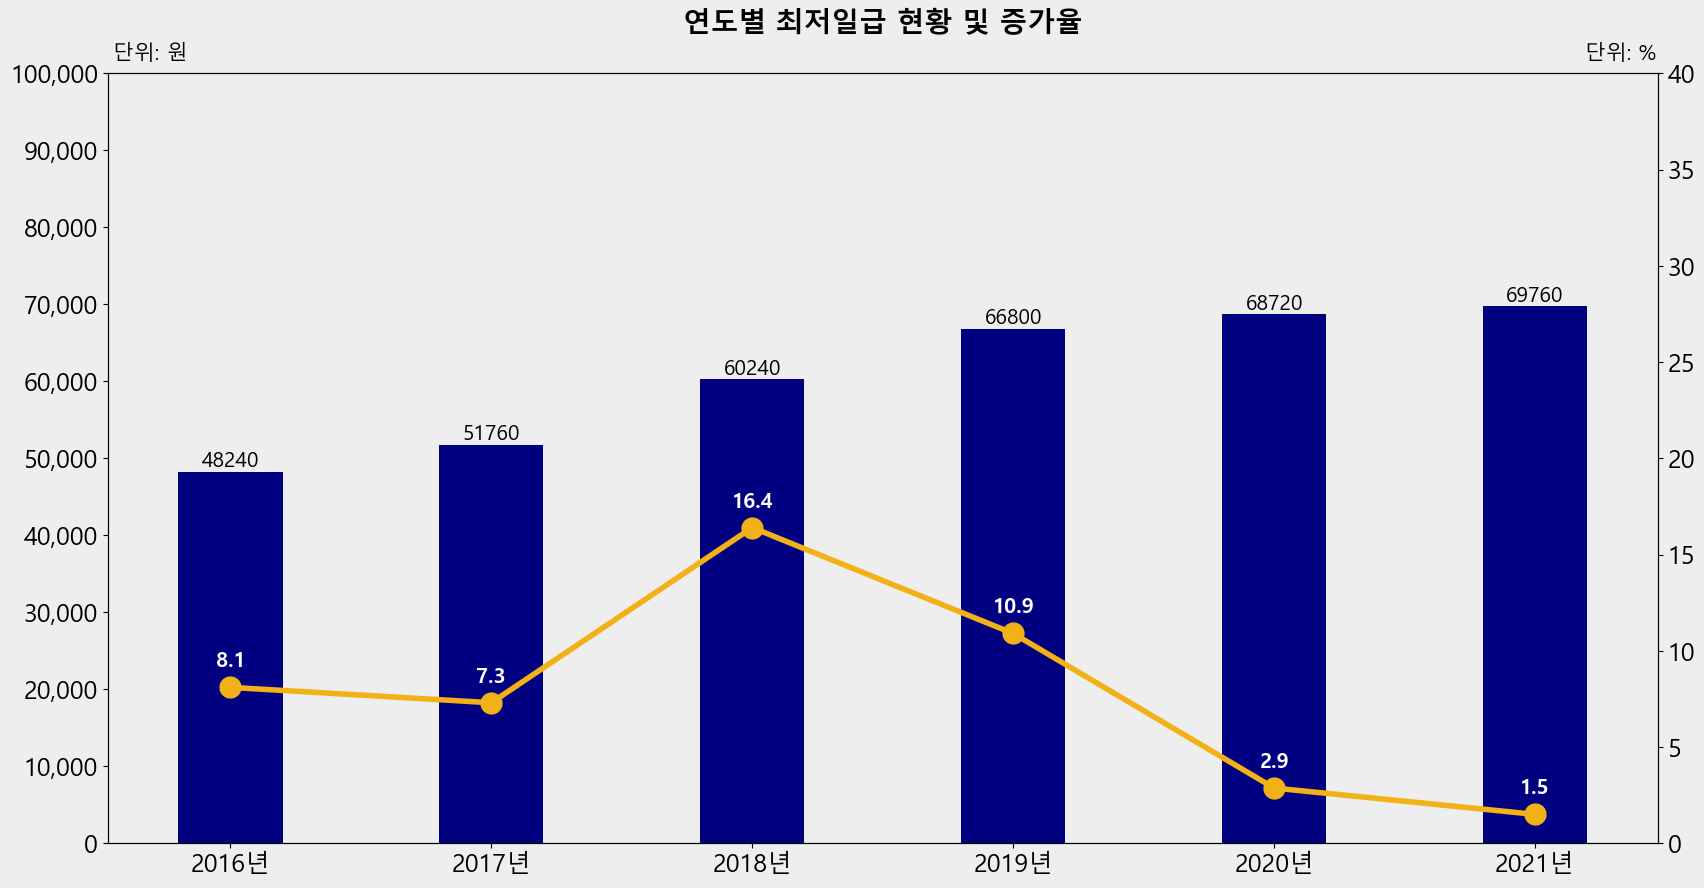

In [97]:
# 정제된 데이터 시각화(최저 일급)
ax1_ylist = np.arange(0,110000,10000)
ax2_ylist = np.arange(0,45,5)

plt.rc('font', family = 'Malgun Gothic', size = 18)
fig, ax1 = plt.subplots(figsize=(20, 10))
fig.set_facecolor('#EEEEEE')

ax1.set_title('연도별 최저일급 현황 및 증가율',fontsize = 20,loc='center', pad=30, fontweight="bold")
ax1.text(-0.45,101800, '단위: 원', fontsize=15, color = 'black')

ax1.bar(min_wage['연도'],min_wage['일급'], width=0.4 ,color ='navy')
ax1.set_facecolor('#EEEEEE')
ax1.set_yticks(ax1_ylist)

# 천원 단위 콤마(,) 찍기
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ax1_ylist])

# 그래프 상단에 값 추가하기
for i, v in enumerate(min_wage['연도']):
    plt.text(v, min_wage['일급'][i], min_wage['일급'][i],
             fontsize = 15,
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

ax2 = ax1.twinx()
ax2.plot(min_wage['연도'],min_wage['인상률'], marker='o', ms= 15,color ='#F2B117')

plt.rcParams['lines.linewidth'] = 4

ax2.set_yticks(ax2_ylist)

ax2.text(5.19,40.7, '단위: %', fontsize=15, color = 'black')

#그래프 상단에 값 추가하기
for i in range(len(min_wage['인상률'])):
    height = min_wage['인상률'][i:i+1]
    plt.text(min_wage['연도'][i:i+1], height + 0.8, '%.1f' %height, ha='center', va='bottom', size = 15, 
             color='white', fontweight='bold')

plt.show()

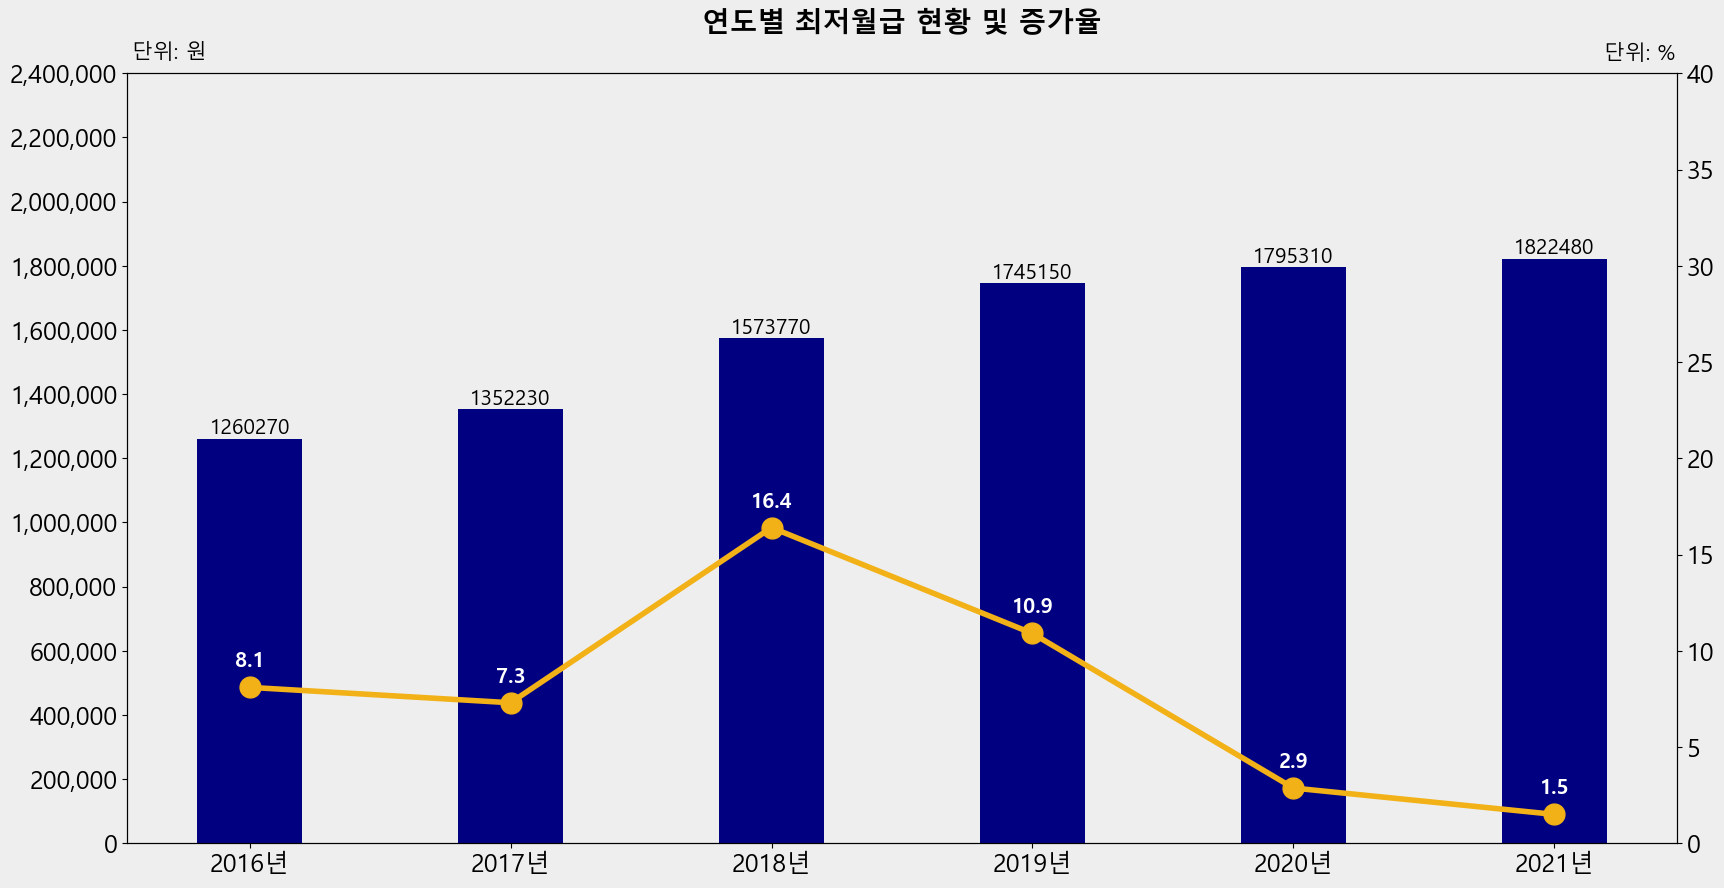

In [95]:
# 정제된 데이터 시각화(최저 월급)
ax1_ylist = np.arange(0,2500000,200000)
ax2_ylist = np.arange(0,45,5)

plt.rc('font', family = 'Malgun Gothic', size = 18)
fig, ax1 = plt.subplots(figsize=(20, 10))
fig.set_facecolor('#EEEEEE')

ax1.set_title('연도별 최저월급 현황 및 증가율',fontsize = 20,loc='center', pad=30, fontweight="bold")

ax1.text(-0.45,2445000, '단위: 원', fontsize=15, color = 'black')

ax1.bar(min_wage['연도'],min_wage['월급'], width=0.4 ,color ='navy')
ax1.set_facecolor('#EEEEEE')
ax1.set_yticks(ax1_ylist)

# 천원 단위 콤마(,) 찍기
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ax1_ylist])

# 그래프 상단에 값 추가하기
for i, v in enumerate(min_wage['연도']):
    plt.text(v, min_wage['월급'][i], min_wage['월급'][i],
             fontsize = 15,
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

ax2 = ax1.twinx()
ax2.plot(min_wage['연도'],min_wage['인상률'], marker='o', ms= 15,color ='#F2B117')

plt.rcParams['lines.linewidth'] = 4

ax2.set_yticks(ax2_ylist)

ax2.text(5.19,40.7, '단위: %', fontsize=15, color = 'black')

#그래프 상단에 값 추가하기
for i in range(len(min_wage['인상률'])):
    height = min_wage['인상률'][i:i+1]
    plt.text(min_wage['연도'][i:i+1], height + 0.8, '%.1f' %height, ha='center', va='bottom', size = 15, 
             color='white', fontweight='bold')

plt.show()